# Lab 2
Arsienij Aniščanka

In [104]:
#classes
L = 4
#sample size
N = 400
#test sample size
T = 40

In [110]:
from matplotlib import colors, pyplot as plt

def display_points(x, y, label=None):
    plt.scatter(x[:,0], x[:,1], c=y)
    if label:
        plt.xlabel(label, fontsize=14)
    plt.show()

## Prepare dataset

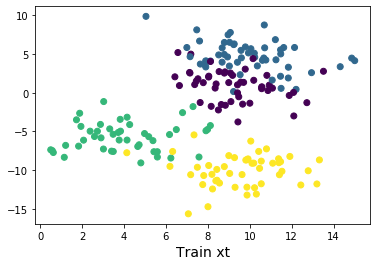

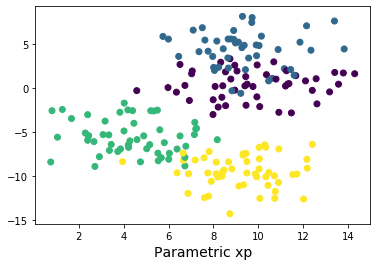

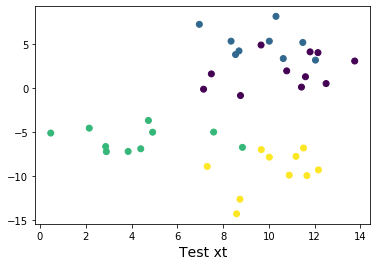

In [111]:
from sklearn import datasets

X, Y = datasets.make_blobs(
    n_samples=N+T,
    n_features=2,
    centers=L,
    cluster_std=2.0,
    shuffle=True,
    random_state=4
)

median = int(N/2)

#split dataset into 3 parts (parametric xp, train xt, test xt)
xt, xp, xk = X[:median], X[median:N], X[N:]
yt, yp, yk = Y[:median], Y[median:N], Y[N:]

display_points(xt, yt, 'Train xt')
display_points(xp, yp, 'Parametric xp')
display_points(xk, yk, 'Test xt')

## Predict

In [112]:
from scipy.spatial import distance_matrix

def predict(test_x, train_x, train_y):
    d = distance_matrix(test_x, train_x)
    b = [[d[i][train_y == j].mean() for j in range(L)] for i in range(len(test_x))]
    test_y = [b[i].index(min(b[i])) for i in range(len(test_x))]
    return test_y


quality: 87.5%


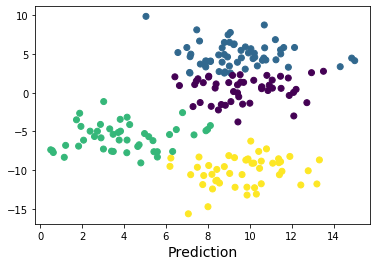

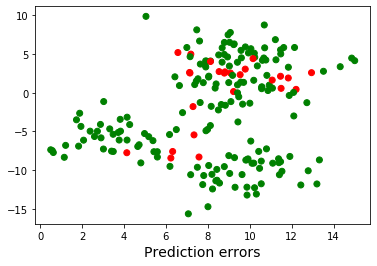

In [113]:
predict_yt = predict(xt, xp, yp)
quality = (yt == predict_yt).mean()
print('quality: {}%'.format(quality * 100))
display_points(xt, predict_yt, 'Prediction')
display_points(xt, list(map(lambda res: 'g' if res else 'r', yt == predict_yt)), 'Prediction errors')

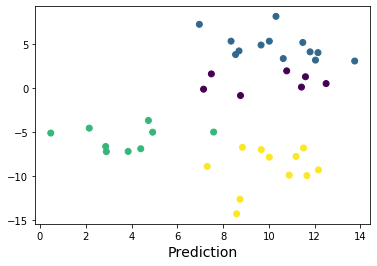

In [114]:
predict_yk = predict(xk, xp, yp)
display_points(xk, predict_yk, 'Prediction')